In [1]:
from utils.ETC import *
from utils.Plot import *
from sgp4.api import WGS72
from sgp4.ext import invjday

In [2]:
# now = datetime.datetime.now()
# 
# time_dict = {}
# time_dict['year'] = now.year
# time_dict['month'] = now.month
# time_dict['day'] = now.day
# time_dict['hour'] = 0
# time_dict['minute'] = 0
# time_dict['second'] = 0
# 
# tles_dict = get_spacemap_tles(time_dict, ["25544", "58932"])
# 
# satellite, e, position, velocity = cal_kinematics_vector_point(time_dict, tles_dict["58932"]["firstLine"],
#                                                                tles_dict["58932"]["secondLine"])

apogees = dict()
perigees = dict()
average_altitudes = dict()
average_velocities = dict()
inclinations = dict()
eccentricities = dict()
RAANs = dict()

In [3]:
epoch = datetime.datetime(2024, 6, 12, 0, 0, 0)

while (epoch < datetime.datetime.now()):
    print(epoch)
    try:
        time_dict = {'year': epoch.year, 'month': epoch.month, 'day': epoch.day}
        tles_dict = get_spacemap_tles(time_dict, ["58932"])
        satellite, _, _, _ = cal_kinematics_vector_point(time_dict, tles_dict["58932"]["firstLine"],
                                                         tles_dict["58932"]["secondLine"])
        # 위성 epoch의 정수부분
        jdsatepoch = satellite.jdsatepoch
        # 위성 epoch의 소수부분
        jdsatepochfrac = satellite.jdsatepochF
        
        average_altitude = 0
        average_velocity = 0

        for i in range(1440):
            # 하루를 1분 단위로 분할한 율리안 날짜의 소수부분
            fr = jdsatepochfrac + i / 1440
            e, r, v = satellite.sgp4(jdsatepoch, fr)
            average_altitude += (r[0] ** 2 + r[1] ** 2 + r[2] ** 2) ** 0.5
            average_velocity += (v[0] ** 2 + v[1] ** 2 + v[2] ** 2) ** 0.5

        average_altitude /= 1440
        average_velocity /= 1440
        earth_radius = 6378.137

        epochdatetime = invjday(jdsatepoch + jdsatepochfrac)
        # 지구 반지름 단위로 표현 되어 있기 때문에 지구 반지름 곱해줘야 함.
        apogees[epochdatetime] = satellite.alta * earth_radius
        perigees[epochdatetime] = satellite.altp * earth_radius
        # 지구 중심으로 부터 고도이기 때문에 지구 반지름 만큼 빼줘야 함.
        average_altitudes[epochdatetime] = average_altitude - earth_radius
        average_velocities[epochdatetime] = average_velocity

        # velocities.append((velocity[0]**2 + velocity[1]**2 + velocity[2]**2)**0.5)
        # 라디안에서 degree로 변환
        rad2deg = 180.0 / np.pi
        # 위성궤도경사각을 degree형태로 변환
        inclinations[epochdatetime] = satellite.inclo * rad2deg
        # 이심률은 변환이 필요없으므로 그대로 저장.
        eccentricities[epochdatetime] = satellite.ecco
        # 적경 상승 교점은 위성의 궤도가 적도면을 가로지르는 상승 노드의 적경을 나타내는 각도
        RAANs[epochdatetime] = satellite.nodeo

    except Exception as e:
        print(f"Error processing epoch {epoch}: {e}")
        pass

    epoch += datetime.timedelta(days=1)
print(apogees)

2024-06-12 00:00:00
Error processing epoch 2024-06-12 00:00:00: 'data'
2024-06-13 00:00:00
Error processing epoch 2024-06-13 00:00:00: 'data'
2024-06-14 00:00:00
Error processing epoch 2024-06-14 00:00:00: 'data'
2024-06-15 00:00:00
2024-06-16 00:00:00
2024-06-17 00:00:00
2024-06-18 00:00:00
2024-06-19 00:00:00
2024-06-20 00:00:00
2024-06-21 00:00:00
{(2024, 6, 14, 13, 12, 15.578776896267257): 482.9005570319622, (2024, 6, 15, 6, 28, 18.84606599834474): 482.82983063947796, (2024, 6, 16, 6, 1, 7.29522943523439): 482.88312383700645, (2024, 6, 17, 19, 41, 36.60430848625215): 483.18164715664943, (2024, 6, 18, 19, 14, 25.079422295360885): 482.66771381383046, (2024, 6, 19, 18, 47, 14.194765985279403): 482.90246449061647, (2024, 6, 20, 4, 12, 21.741688549785934): 482.79332194601756}


In [4]:
print("Apogees")
print_statistics(apogees)
print("Perigees")
print_statistics(perigees)
print("Average Altitudes")
print_statistics(average_altitudes)
print("Average Velocities")
print_statistics(average_velocities)
print("Inclinations")
print_statistics(inclinations)
print("Eccentricities")
print_statistics(eccentricities)
print("RAANs")
print_statistics(RAANs)
print(find_max_key(perigees))

Apogees
min: 482.66771381383046
max: 483.18164715664943
average: 482.87980841650864
median: 482.88312383700645
standard deviation: 0.15653712448927545
variance: 0.024503871343370922
range: 0.513933342818973

Perigees
min: 480.9164137293975
max: 481.21137381239726
average: 481.10127035207904
median: 481.12577812206973
standard deviation: 0.09226578127012919
variance: 0.008512974393387322
range: 0.29496008299975074

Average Altitudes
min: 481.3503692459972
max: 481.5864738839391
average: 481.49816240086574
median: 481.50361193210756
standard deviation: 0.07442224194345386
variance: 0.0055386700958899825
range: 0.23610463794193493

Average Velocities
min: 7.623077549740737
max: 7.623206369905834
average: 7.623123821153279
median: 7.623120094641578
standard deviation: 4.115626288387111e-05
variance: 1.6938379745663065e-09
range: 0.00012882016509685457

Inclinations
min: 53.1581
max: 53.1607
average: 53.15935714285715
median: 53.1592
standard deviation: 0.0009692903638844211
variance: 9.395

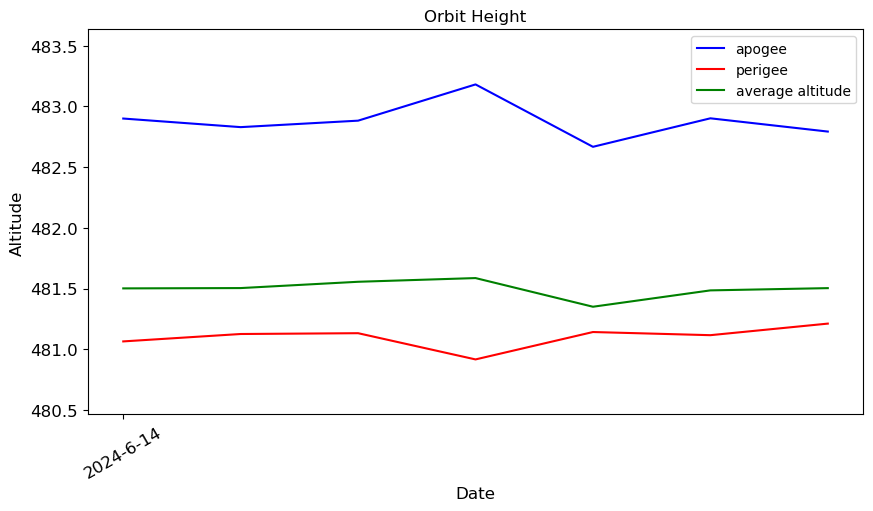

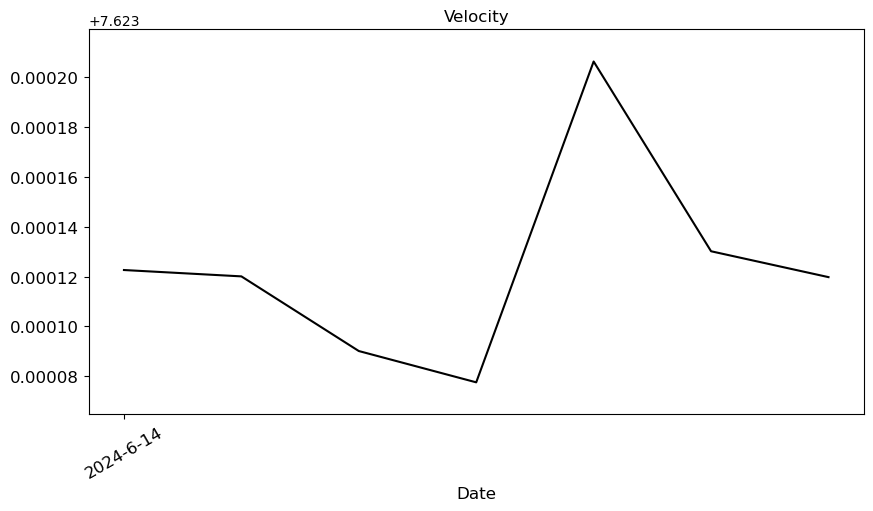

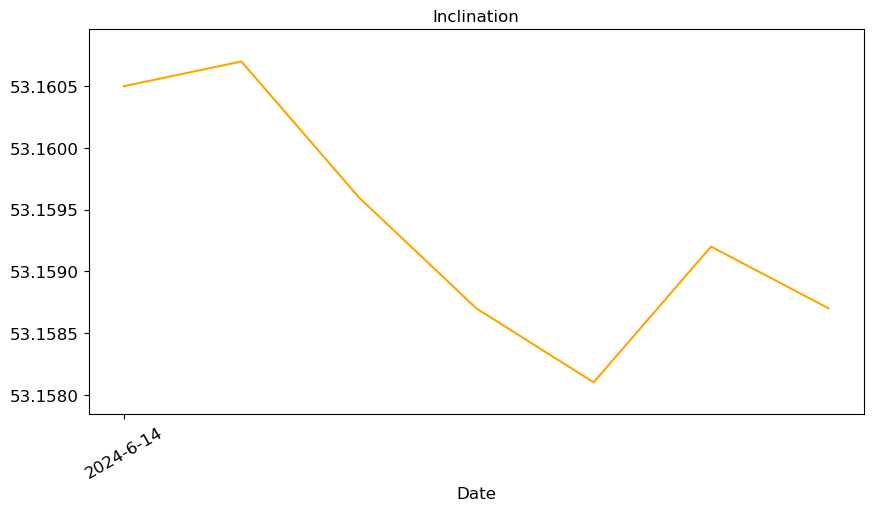

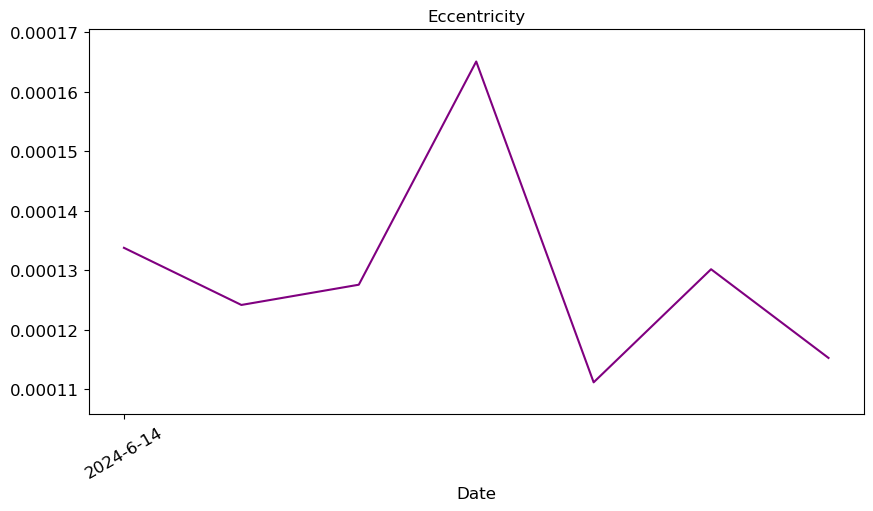

In [5]:
draw_altitudes(apogees, perigees, average_altitudes)
draw_graph(average_velocities, 'Velocity', '', "black")
draw_graph(inclinations, 'Inclination', '', 'orange')
draw_graph(eccentricities, 'Eccentricity', '', 'purple')